In [1]:
!conda install -c anaconda xlrd --yes

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.7.11

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs: 
    - xlrd


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-1.1.1              |       h7b6447c_0         5.0 MB  anaconda
    xlrd-1.2.0                 |           py36_0         188 KB  anaconda
    certifi-2019.6.16          |           py36_1         156 KB  anaconda
    ------------------------------------------------------------
                                           Total:         5.4 MB

The following packages will be UPDATED:

    certifi: 2019.6.16-py36_1  conda-forge --> 2019.6.16-py36_1 anaconda
    openssl: 1.1.1c-h516909a_0 conda-forge --> 1.1.1-h7b6

In [42]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library

In [43]:
df_can = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2)

print ('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


In [44]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [45]:
df_can.columns.tolist()
df_can.index.tolist()

print (type(df_can.columns.tolist()))
print (type(df_can.index.tolist()))

<class 'list'>
<class 'list'>


In [46]:
# in pandas axis=0 represents rows (default) and axis=1 represents columns.
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)
df_can.head()

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


In [47]:
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)
df_can.columns

Index([  'Country', 'Continent',    'Region',   'DevName',        1980,
              1981,        1982,        1983,        1984,        1985,
              1986,        1987,        1988,        1989,        1990,
              1991,        1992,        1993,        1994,        1995,
              1996,        1997,        1998,        1999,        2000,
              2001,        2002,        2003,        2004,        2005,
              2006,        2007,        2008,        2009,        2010,
              2011,        2012,        2013],
      dtype='object')

In [48]:
df_can['Total'] = df_can.sum(axis=1)

In [49]:
df_can[['Country', 1980, 1981, 1982, 1983, 1984, 1985]] # returns a dataframe
# notice that 'Country' is string, and the years are integers. 
# for the sake of consistency, we will convert all column names to string later on.

,Country,1980,1981,1982,1983,1984,1985
0,Afghanistan,16,39,39,47,71,340
1,Albania,1,0,0,0,0,0
2,Algeria,80,67,71,69,63,44
3,American Samoa,0,1,0,0,0,0
4,Andorra,0,0,0,0,0,0
...,...,...,...,...,...,...,...
190,Viet Nam,1191,1829,2162,3404,7583,5907
191,Western Sahara,0,0,0,0,0,0
192,Yemen,1,2,1,6,0,18
193,Zambia,11,17,11,7,16,9


In [50]:
df_can.set_index('Country', inplace=True)

In [51]:
#the full row data (all columns)
print(df_can.loc['Turkey'])



Continent                  Asia
Region             Western Asia
DevName      Developing regions
1980                        481
1981                        874
1982                        706
1983                        280
1984                        338
1985                        202
1986                        257
1987                        397
1988                        346
1989                        488
1990                        767
1991                        941
1992                       1116
1993                       1316
1994                        908
1995                        732
1996                        638
1997                        679
1998                        777
1999                        806
2000                       1101
2001                       1184
2002                       1301
2003                       1338
2004                       1736
2005                       2065
2006                       1638
2007                       1463
2008    

In [52]:
df_can.columns = list(map(str, df_can.columns))

In [53]:
years = list(map(str, range(1980, 2014)))
years

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

In [54]:
# we are using the inline backend
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

In [55]:
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.1.1


In [56]:
print(plt.style.available)
mpl.style.use(['ggplot']) # optional: for ggplot-like style

['Solarize_Light2', '_classic_test', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'tableau-colorblind10']


In [57]:
from_turkey = df_can.loc['Turkey', years] # passing in years 1980 - 2013 to exclude the 'total' column
from_turkey.head()

1980    481
1981    874
1982    706
1983    280
1984    338
Name: Turkey, dtype: object

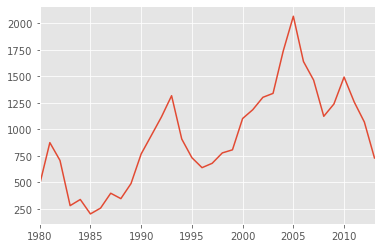

In [58]:
from_turkey.plot()

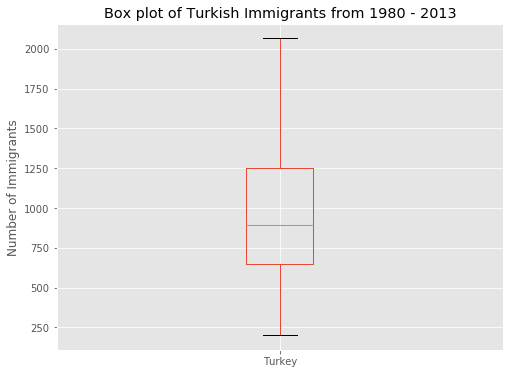

In [39]:
from_turkey.plot(kind='box', figsize=(8, 6))

plt.title('Box plot of Turkish Immigrants from 1980 - 2013')
plt.ylabel('Number of Immigrants')

plt.show()

In [69]:
from_turkey.head()

1980    481
1981    874
1982    706
1983    280
1984    338
Name: Turkey, dtype: object

In [62]:
import seaborn as sns

In [70]:
from_turkey = df_can.loc[['Turkey'], years]

In [71]:
from_turkey = pd.DataFrame(from_turkey[years].sum(axis=0))

In [72]:
from_turkey.head()

,0
1980,481
1981,874
1982,706
1983,280
1984,338


In [73]:
from_turkey.reset_index(inplace=True)


In [74]:
from_turkey.columns = ['year', 'total']

In [76]:
from_turkey.head()

,year,total
0,1980,481
1,1981,874
2,1982,706
3,1983,280
4,1984,338


In [77]:
from_turkey['year'] = from_turkey['year'].astype(int)

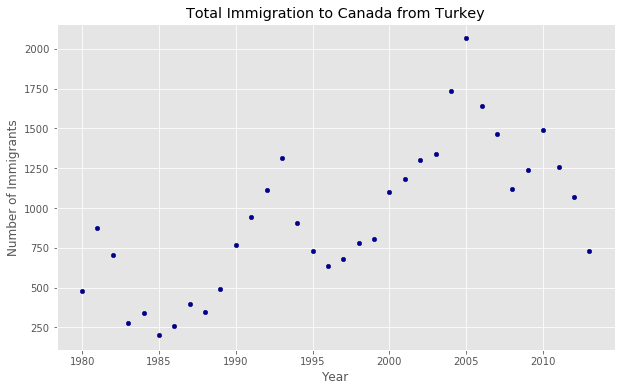

In [79]:
from_turkey.plot(kind='scatter', x= 'year', y='total', figsize=(10, 6), color='darkblue')

plt.title('Total Immigration to Canada from Turkey')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

plt.show()


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


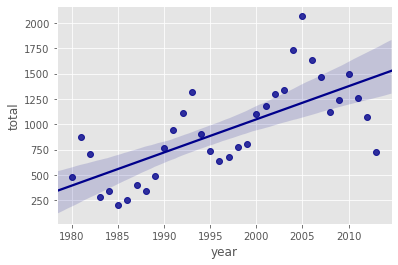

In [80]:
sns.regplot(x='year', y='total', data = from_turkey, color='darkblue')

In [82]:
df_can_t = df_can[years].transpose() # transposed dataframe

# cast the Years (the index) to type int

df_can_t.index = map(int, df_can_t.index)

# let's label the index. This will automatically be the column name when we reset the index
df_can_t.index.name = 'Year'

# reset index to bring the Year in as a column
df_can_t.reset_index(inplace=True)

# view the changes
df_can_t.head()

Country,Year,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,...,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Western Sahara,Yemen,Zambia,Zimbabwe
0,1980,16,1,80,0,0,1,0,368,0,...,9378,128,0,0,103,1191,0,1,11,72
1,1981,39,0,67,1,0,3,0,426,0,...,10030,132,0,0,117,1829,0,2,17,114
2,1982,39,0,71,0,0,6,0,626,0,...,9074,146,0,0,174,2162,0,1,11,102
3,1983,47,0,69,0,0,6,0,241,0,...,7100,105,0,0,124,3404,0,6,7,44
4,1984,71,0,63,0,0,4,42,237,0,...,6661,90,0,0,142,7583,0,0,16,32


In [83]:
norm_turkey = (df_can_t['Turkey'] - df_can_t['Turkey'].min()) / (df_can_t['Turkey'].max() - df_can_t['Turkey'].min())

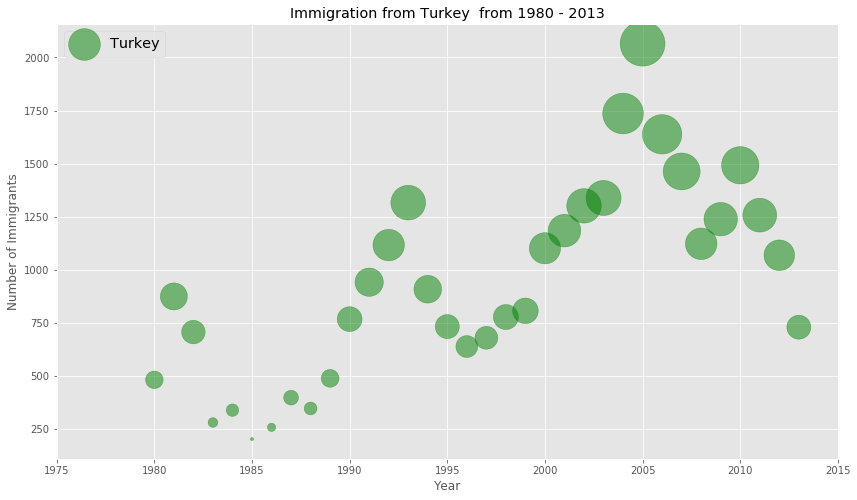

In [86]:
# Turkey
ax0 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='Turkey',
                    figsize=(14, 8),
                    alpha=0.5,                  # transparency
                    color='green',
                    s=norm_turkey * 2000 + 10,  # pass in weights 
                    xlim=(1975, 2015)
                   )

ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from Turkey  from 1980 - 2013')
ax0.legend(['Turkey'], loc='upper left', fontsize='x-large')
